In [2]:
from scipy.stats import spearmanr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Early Head Start Research and Evaluation (EHSRE) Study, 1996-2010
> Early Head Start Programs focus on enhancing early childhood development for low-income children from birth to age 3 [(Love, Elianson-Kisker, & Brooks-Gunn, 2004)](https://doi.org/10.3886/ICPSR03804.v5). Both Head Start, and Early Head Start, are federal programs prepapring low-income children for school by supporting their congitive and emotional development. Program curriculum supports a wide variety of early learning with a focus on language and literacy. The purpose of the Early Head Start Research and Evaluation Study(EHSRE; 1996-2010) was to twofold. First, researchers documented the experiences of the families enrolled in Head Start programs using the Family and Child Experiences Survey (FACES, 1997). Second, FACES assessed the academic outcomes in Early Head Start. 

# Research Questions
> FACES measured the cognitive, social, emotional and physical development of Head Start children along with their familial history. Researchers were initially interested in the basic demographic composition of children and families enrolled in Early Head Start along with how the program impacted their academic success. Outside of home environment, FACES also assessed variables critical for children's overall well-being. 

> Reducing the amount of poverty in the United States is a major theme of the Head Start programs [(Zigler & Valentine, 1979)](https://eric.ed.gov/?id=ED183266). A substantial amount of research has documented many adverse links between poverty in early childhood and education. Residing in low-income neighborhoods is associated with increased rates of academic failure such as grade dropout [(Rokosa, 2011)](https://www.americanprogress.org/issues/poverty/news/2011/10/20/10547/fighting-the-war-on-poverty-with-early-childhood-education/). Startlingly, research even finds neurological disadvatnages of children from poverty. Poor children exhibit structural brain differences with lower hippocampus and frontal lobe volume  compared to non-poor children [(Katsnelson, 2015)](http://www.pnas.org/content/112/51/15530.full). 

> This report builds on the initial research questions from the EHSRE Study(1996-2010) by focusing on the relationships among poverty and early childhood by asking:
1. Is the level of family poverty related to how many books children have in their homes?
2. Does the level of family poverty affect how much parents help their children with homework?
3. Is poverty related to poorer academic performance in math and vocabulary?  


# Description of EHSRE Variables
> Data in this report were obtained from the [Early Head Start Research and Evaluation Study](https://doi.org/10.3886/ICPSR03804.v5) by the United States Department of Health and Human Services, Administration for Children and Families. [Child Care & Early Education Research Connections](http://www.researchconnections.org/childcare/welcome) provided the data to the general public fulfillg its mission to inform public policy from high-quality research through releasing free datasets.  

> There are a total of 1059 variables collected between 1996-2010 in the EHSRE study. This report includes 1983908193 variables related to early childhood developememt. It's hypothesized these variables potentially affect:cognitive, social, and emotional development. Focusing on development in early child is essential since toddlers, as well as older children, are at a criticial period for these skills to develop.  

 > The variables selected for this stidy belong to four research areas known to affect early childhood. First, there is an extensive literature analyzing the home life of children in low-income families.  Second, researchers documented the academic and personal histories of adult caregivers. Third, researchers are concerned with the level of accademic support for children recieved outside of school. The fourth category belonging to early development are the actual outcomes variables such as, academic performance in math and reading. 
 
 > Presented below is each variable in this report and related developmental category.
 
 > 1. Family History:
 * a. Level of poverty for each family
 * b. Annual family income
 
 > 2. Home life:
 * a. The number of books each child has at home
 * b. The number of times parents help children with their homework
 * c. monthly access to food(food security)
 
 > 3. Academic outcomes:
 * a. Math standardized test results
 * b. Vocabularly comprehension
 
   

# Family History 

In [3]:
# create a variable name from the original EHSRE code book.
early = pd.read_csv('EHSRE_data.csv')
early['poverty_ratio'] = early['POVRATIO']
del early['POVRATIO']

# examine the normality of the family history variable, level of family poverty
early['poverty_ratio'].describe()



count    756.000000
mean      63.909484
std       51.978235
min        0.000000
25%       29.807500
50%       56.760000
75%       87.940000
max      384.360000
Name: poverty_ratio, dtype: float64

In [4]:
# create a variable name from the original EHSRE code book.
early['income']= early['B5P_INYC']
del early['B5P_INYC']

# examine the normality of the family history variable, annual income
early['income'].describe()


count       756.000000
mean      36935.185185
std       31240.083440
min        2500.000000
25%       17500.000000
50%       27500.000000
75%       45000.000000
max      201000.000000
Name: income, dtype: float64

## Normality of family history variable: level of family poverty
> The level of poverty per family is measured by multiplying family income by 100 and then dividing by the federal poverty level. Ratio values less than 100% are considered "in poverty" and incomes 50% below their poverty threshold are in "deep poverty". Below are the complete income categories used to officiallly measure poverty in the United States:ratios that compare the income levels of people or families with their poverty threshold:
* Values > 100% "above poverty"
* < 125% Values > 100% "near poverty"
* Values < 100% "in poverty"
* Values < 50% "in deep poverty"
>The boxplot shows the median ratio of income to poverty threshold is just above 50%. The poverty ratios are defintley skewed with the presence of outliers over 100% their income to poverty threshhold. The histogram also supports a negativlely skewed distribution with most values above the mean at 63.91% of income to poverty threshold. 

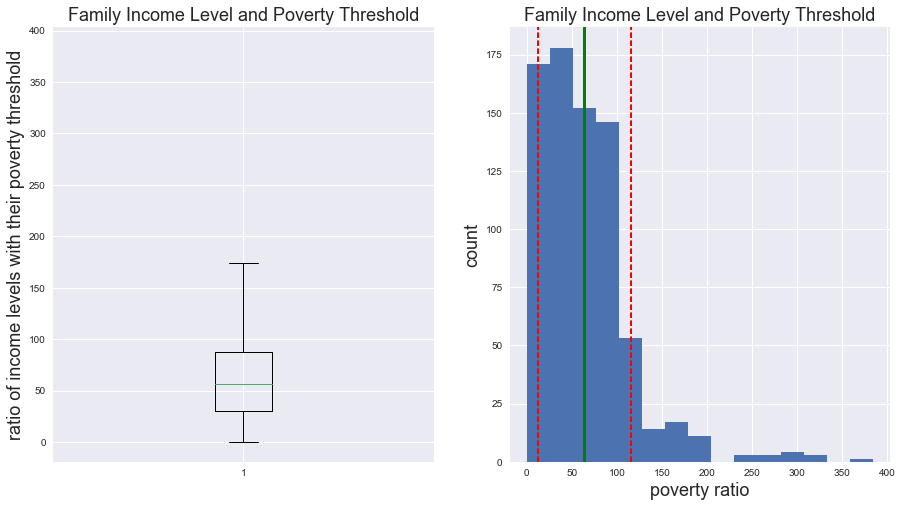

In [5]:
# what does the distribution of family poverty ratio look like when plotted as a boxplot and histogram?
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.boxplot(early['poverty_ratio'])
plt.ylabel('ratio of income levels with their poverty threshold',fontsize=18)
plt.title('Family Income Level and Poverty Threshold', fontsize=18)

plt.subplot(1, 2, 2)
plt.hist(early['poverty_ratio'], bins= 15)
center = np.mean(early['poverty_ratio'])
plt.ylabel('count',fontsize=18)
plt.xlabel('poverty ratio', fontsize=18)
plt.title('Family Income Level and Poverty Threshold', fontsize=18)
plt.axvline(x = np.mean(early['poverty_ratio']), linewidth= 3, color="green")
plt.axvline(np.mean(early['poverty_ratio']) - np.std(early['poverty_ratio']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['poverty_ratio']) + np.std(early['poverty_ratio']), color='r', linestyle='dashed', linewidth=2)
plt.show()

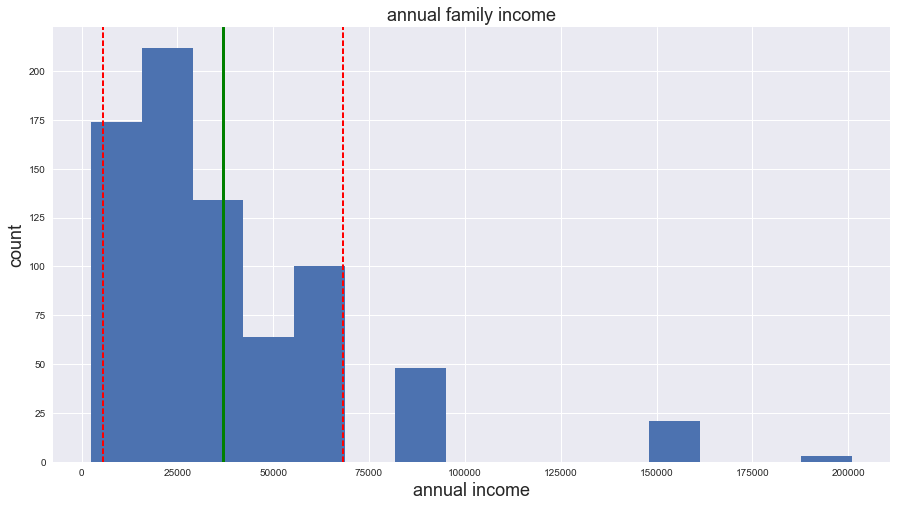

In [6]:
# what does the distribution of annual income look like when plotted as a  histogram?
plt.figure(figsize=(15, 8))
plt.hist(early['income'], bins= 15)
center = np.mean(early['income'])
plt.xlabel('annual income', fontsize=18)
plt.title('annual family income', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.axvline(x = np.mean(early['income']), linewidth= 3, color="green")
plt.axvline(np.mean(early['income']) - np.std(early['income']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['income']) + np.std(early['income']), color='r', linestyle='dashed', linewidth=2)
plt.show()

# Home Life

In [7]:
# create a variable name from the original EHSRE code book.
early['help_homework'] = early['B5PHLPHW']
del early['B5PHLPHW']
# examine the normality of the home life variable, help with homework
early['help_homework'].describe() 


count    756.000000
mean       3.272487
std        0.874107
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        4.500000
Name: help_homework, dtype: float64

In [8]:
# examine the normality of the home life variable, how many books does the child have at home?
early['book_number'] = early['B5P467']
del early['B5P467']
early['book_number'].describe()

count    756.000000
mean      60.074074
std       84.803176
min        0.000000
25%       15.000000
50%       30.000000
75%       75.000000
max      999.000000
Name: book_number, dtype: float64

## Normality of family life variables: homework help and books at home
> A majority of parents helped their children with homework 3.5 followed by 3 times a month. There was a tie for the number of times parents helped children 4 and 4.5 times a month. The number of books at home had a very spread distribution with most children having 100 books at home but a few own over 400-1,000 books. 

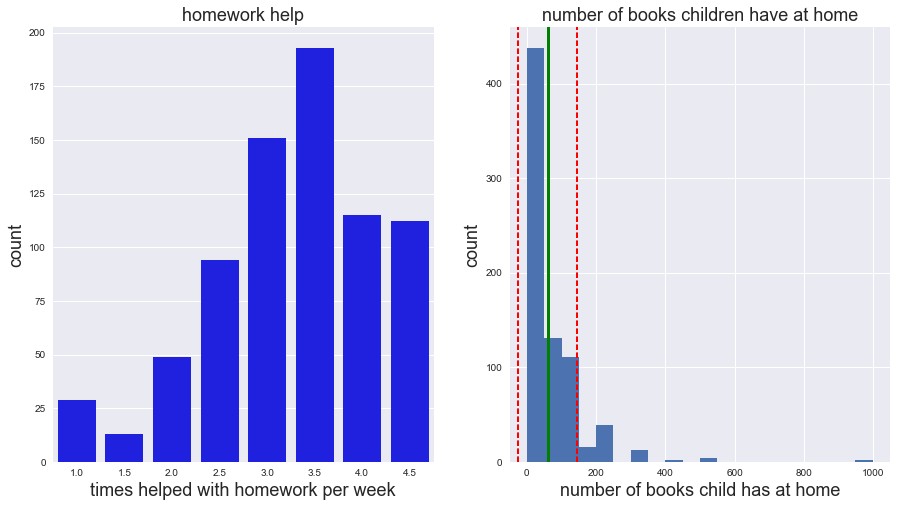

In [9]:
# what do the distributions of help with homework, how many books each child has, and food security look like when plotted ?

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1) 
ax = sns.countplot(early['help_homework'], color ="b")
ax.set(xlabel='number of times parent helps with homework', ylabel='count')
plt.title('homework help', fontsize=18)
plt.xlabel('times helped with homework per week', fontsize=18)
plt.ylabel('count', fontsize=18)


plt.subplot(1, 2, 2)
plt.hist(early['book_number'], bins= 20)
center = np.mean(early['book_number'])
plt.ylabel('count', fontsize=18)
plt.xlabel('number of books child has at home',fontsize=18)
plt.title('number of books children have at home', fontsize=18)
plt.axvline(x = np.mean(early['book_number']), linewidth= 3, color="green")
plt.axvline(np.mean(early['book_number']) - np.std(early['book_number']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['book_number']) + np.std(early['book_number']), color='r', linestyle='dashed', linewidth=2)

plt.show()


> The FACES codebook listed the number of books children have at home as a continous variable. However, the histogram above reveals this might not be the case with book numbers only taking discrete values. Creating categorical groups of book numbers gives a better sense of the book distribution. Next, these groups can be replotted into another histogram to see this new distribution.  

In [10]:
# create categories and names
bins = [0,30,40,50,60,70,80,90,100,110,125]
group_names = [0,30,40,50,60,70,80,90,100,110]

categories = early.groupby(pd.cut(early['book_number'], bins,labels=group_names)).count()
categories['number_of_books'] = categories['book_number']
del(categories['book_number'])
# after groupby or pd.cut
categories.reset_index()

,book_number,HGCG,RACE,FOOD,TRANSPRT,B5P_INCN,B5P_CESD,C5SUCCES2,B4FSAPPR,B1P_VPRD,C5C_SAD,C5MATHRA,B1P_VCOM,poverty_ratio,income,help_homework,number_of_books
0,0,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
1,30,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
2,40,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
3,50,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
4,60,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
5,70,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
6,80,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,90,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
8,100,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9,110,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


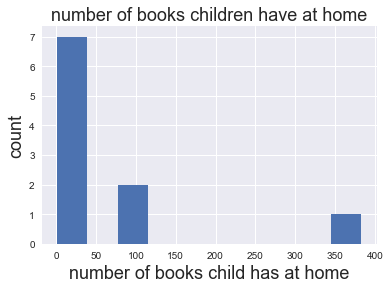

In [11]:
#create histogram based on new categories
plt.hist(categories['number_of_books']) 
plt.ylabel('count', fontsize=18)
plt.xlabel('number of books child has at home',fontsize=18)
plt.title('number of books children have at home', fontsize=18)

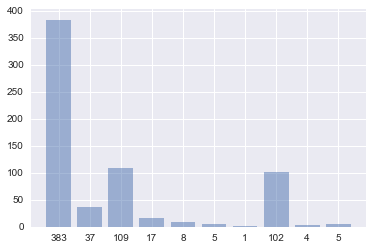

In [12]:
# create a bar plot showing book categories
book_groups = ['0','30','40','50','60','70','80','90','100','110']
y_pos = np.arange(len(book_groups))
books = [383, 37, 109, 17, 8, 5, 1, 102, 4, 5]
plt.bar(y_pos,books, align='center', alpha=0.5)
plt.xticks(y_pos, books)
plt.ylabel('')
plt.title('')
 
plt.show()

## Frequency distribution of the family life variable: access to food
> Food access included only two discrete categories as response options. Thus, unlike other variables in this report, describing its normality would not make sense. FACES included two response options regarding family food security on a monthly basis. Children either did or did not have adequate amounts of food. Most families reported access to adequate amounts of food. 


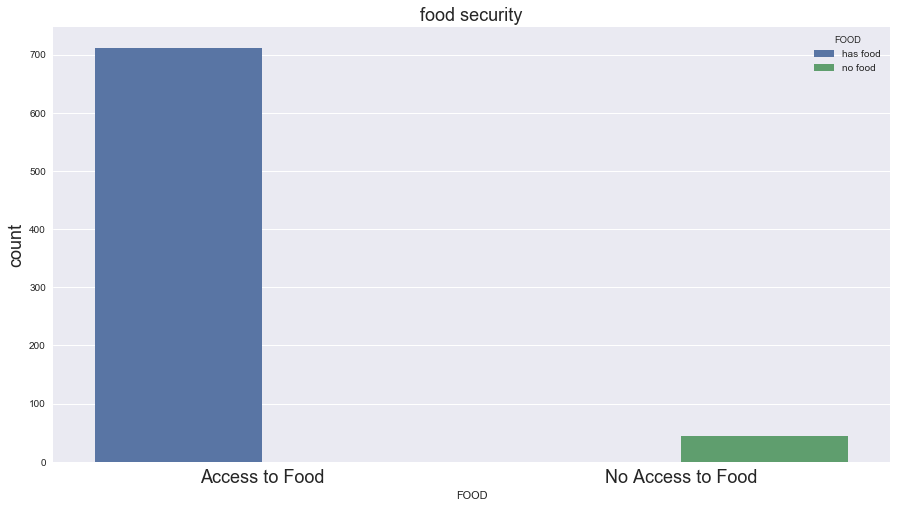

In [15]:
# summary statistics of how many families have monthly access to food

plt.figure(figsize=(15, 8))
ax = sns.countplot(early['FOOD'], hue= early['FOOD'])

ax.set_xticklabels(['Access to Food','No Access to Food'],fontsize=18, rotation='horizontal')
plt.title('food security', fontsize=18)
plt.ylabel('count', fontsize=18)

plt.show()

# Academic Outcomes

In [59]:
# create a variable name from the original EHSRE code book.
early['vocab'] = early['B1P_VCOM']
early['math'] = early['C5MATHRA']

# examine the normality of the academic variable, vocab
early['vocab'].describe()


count    756.000000
mean      48.108466
std       19.224815
min        2.000000
25%       35.000000
50%       48.000000
75%       62.000000
max       89.000000
Name: vocab, dtype: float64

In [60]:
# examine the normality of the academic variable, math
early['math'].describe()

count    756.00000
mean       8.64418
std        4.58175
min        0.00000
25%        5.00000
50%        9.00000
75%       12.00000
max       18.00000
Name: math, dtype: float64

## Normality of academic variables: math and vocabulary scores

> Vocabulary comprehension was measured on FACES using the MacArthur-Bates Communicative Development Inventories (CDIs). The McArthur captures children's early language development through parental report. Development of vocabulary comprehension is nearly normal with children scoring an average of 50 points, but equal amounts of children falling above and below this average. 
> Math achievement was measured on the Early Childhood Longitudinal Study (ECLS) 5th grade math assessment. 


<function matplotlib.pyplot.show>

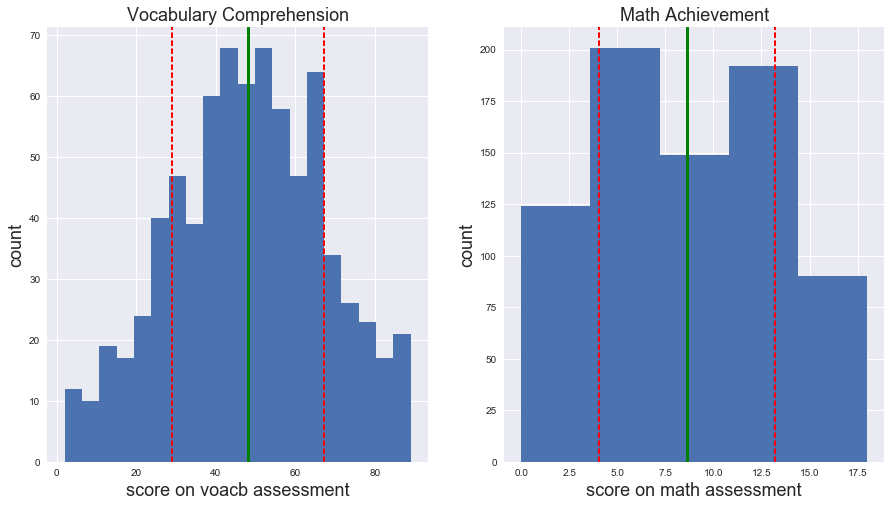

In [61]:
# what do the distributions of vocabularly and math scores look like when plotted?

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.hist(early['vocab'], bins= 20)
center = np.mean(early['vocab'])
plt.ylabel('count', fontsize=18)
plt.xlabel('score on voacb assessment', fontsize=18)
plt.title('Vocabulary Comprehension', fontsize=18)
plt.axvline(x = np.mean(early['vocab']), linewidth= 3, color="green")
plt.axvline(np.mean(early['vocab']) - np.std(early['vocab']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['vocab']) + np.std(early['vocab']), color='r', linestyle='dashed', linewidth=2)

plt.subplot(1, 2, 2)
plt.hist(early['math'], bins= 5)
center = 8
plt.ylabel('count', fontsize=18)
plt.xlabel('score on math assessment', fontsize=18)
plt.title('Math Achievement', fontsize=18)
plt.axvline(x = np.mean(early['math']), linewidth= 3, color="green")
plt.axvline(np.mean(early['math']) - np.std(early['math']), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(early['math']) + np.std(early['math']), color='r', linestyle='dashed', linewidth=2)
plt.show


#  Research Question 1: Are poverty levels related to the number of books at home?

Aggregating books into bins makes it easier to see how books are related to other categorical or continous variables.

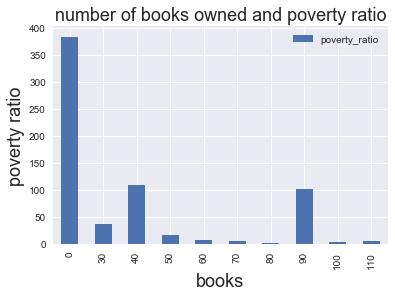

In [62]:
plt.figure(figsize=(15, 8))

categories.plot(kind='bar',y="poverty_ratio")
plt.title('number of books owned and poverty ratio', fontsize=18)
plt.xlabel('books', fontsize=18)
plt.ylabel('poverty ratio', fontsize=18)
plt.show()

## What about book numbers for children living in deep poverty?

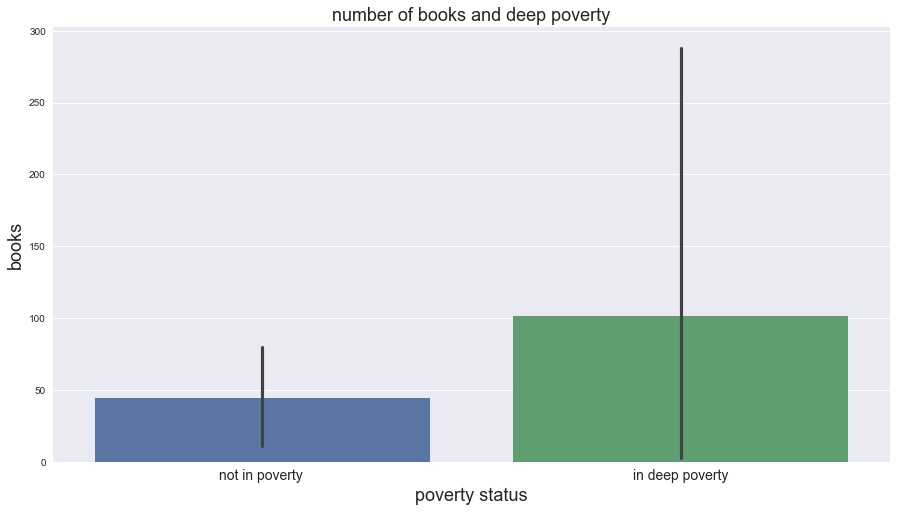

In [63]:
# filter children from families in deep poverty
early['poverty_ratio_deep'] = early['poverty_ratio'] <50

plt.figure(figsize=(15, 8))

ax = sns.barplot(y=categories["number_of_books"], x="poverty_ratio_deep", data=early)
ax.set_xticklabels(['not in poverty ','in deep poverty'],fontsize=14,rotation='horizontal')
plt.xlabel('poverty status', fontsize=18)
plt.ylabel('books', fontsize=18)
plt.title('number of books and deep poverty', fontsize=18)
plt.show()

## Is access to food related to book numbers and poverty?

It might be meaningful to examine poverty levels and book numbers for children with below the average of 38 books. Is access to food related to how much many books children own?

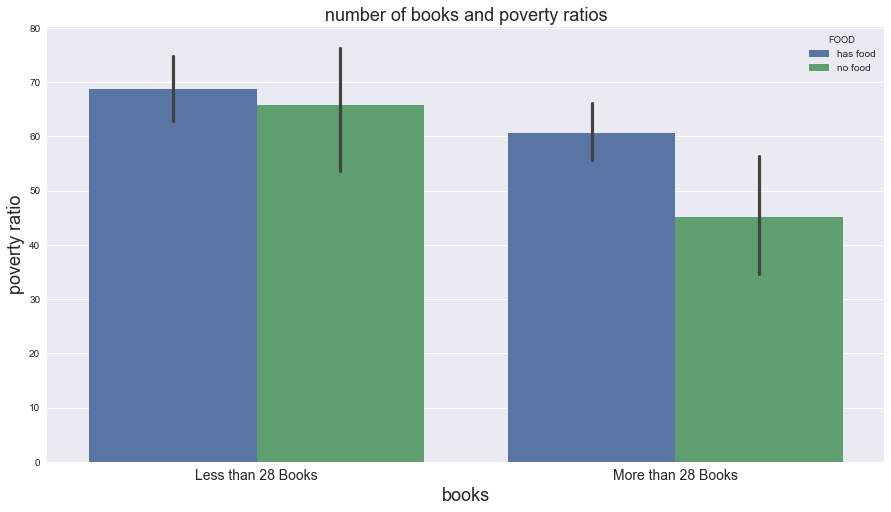

In [14]:
early['book_less'] = early['book_number'] <38
early['FOOD'] = early['FOOD'].map({0:'has food',1:'no food'})

plt.figure(figsize=(15, 8))
abar =sns.barplot(y="poverty_ratio", x='book_less',hue="FOOD", data=early)
abar.set(xlabel='books', ylabel='poverty ratio')
abar.set_xticklabels(['Less than 28 Books','More than 28 Books'],fontsize=14,rotation='horizontal')
plt.xlabel('books', fontsize=18)
plt.ylabel('poverty ratio', fontsize=18)
plt.title('number of books and poverty ratios', fontsize=18)
plt.show()


## Other variables related to how many books children own?

It's likely book numbers are not only related to a few variables such as, access to food and poverty levels, but a combination of other relevant factors. Is the race of children in the FACES study related to book numbers?

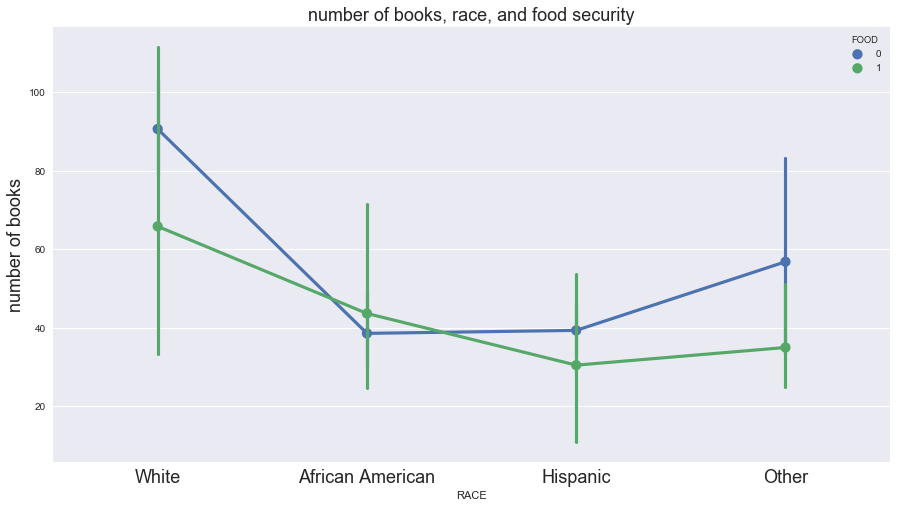

In [65]:
plt.figure(figsize=(15, 8))
ax = sns.pointplot(x="RACE", y="book_number", hue="FOOD", data=early)
ax.set_xticklabels(['White','African American', 'Hispanic', 'Other'],fontsize=18, rotation='horizontal')
plt.ylabel('number of books', fontsize=18)
plt.title('number of books, race, and food security', fontsize=18)
plt.show()

# Research Question 2: are poverty levels related to how much parents help children with their homework?

Once again like book number, FACES notes help with homework is a continous variable, yet it appears discrete. Aggregating values into bins makes it easier to visualize its distribution and how it is related to other types of variables. 

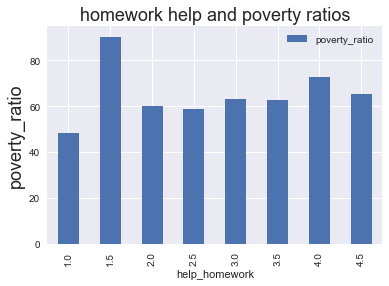

In [66]:
bins = [0,1,1.5,2,2.5,3,3.5,4,4.5]
group_names = [1,1.5,2,2.5,3,3.5,4,4.5]

help_categories = early.groupby(pd.cut(early['help_homework'], bins,labels=group_names)).mean()
help_categories['help_with_homework'] = help_categories['help_homework']
del(help_categories['help_homework'])
# after groupby or pd.cut
help_categories.reset_index()

plt.figure(figsize=(17, 9))
help_categories.plot(kind='bar',y="poverty_ratio")
plt.ylabel('poverty_ratio', fontsize=18)
plt.title('homework help and poverty ratios', fontsize=18)
plt.show()


## For children living in deep poverty, how often do their parents help with homework? Are these amounts the same for children not living in deep poverty?

In [75]:
bins = [0,1,1.5,2,2.5,3,3.5,4,4.5]
group_names = [1,1.5,2,2.5,3,3.5,4,4.5]

help_categories = early.groupby(pd.cut(early['help_homework'], bins,labels=group_names)).mean()
help_categories['help_with_homework'] = help_categories['help_homework']
del(help_categories['help_homework'])
# after groupby or pd.cut
help_categories.reset_index()


,help_homework,HGCG,RACE,FOOD,TRANSPRT,POVRATIO,B5P_INCN,B5PHLPHW,B5P_CESD,C5SUCCES2,...,B5P467,B5P_INYC,poverty_ratio,income,book_number,vocab,math,poverty_ratio_deep,book_less,help_with_homework
0,1.0,1.724138,1.758621,0.000000,0.137931,48.324138,1.086552,1.0,8.793103,0.517241,...,29.586207,27586.206897,48.324138,27586.206897,29.586207,45.275862,7.344828,0.551724,0.655172,1.0
1,1.5,2.230769,1.692308,0.153846,0.153846,90.315385,1.986154,1.5,4.461538,0.769231,...,63.000000,47692.307692,90.315385,47692.307692,63.000000,46.000000,10.692308,0.307692,0.384615,1.5
2,2.0,1.857143,1.897959,0.040816,0.224490,60.078776,1.505918,2.0,7.653061,0.408163,...,41.693878,34387.755102,60.078776,34387.755102,41.693878,46.918367,8.673469,0.489796,0.734694,2.0
3,2.5,1.819149,2.063830,0.010638,0.202128,58.739362,1.704787,2.5,6.712766,0.617021,...,52.531915,40771.276596,58.739362,40771.276596,52.531915,45.446809,9.212766,0.468085,0.574468,2.5
4,3.0,1.960265,1.827815,0.079470,0.225166,63.036093,1.614040,3.0,7.934371,0.622517,...,58.675497,37953.642384,63.036093,37953.642384,58.675497,48.013245,9.125828,0.430464,0.543046,3.0
5,3.5,1.875648,1.937824,0.072539,0.202073,62.569171,1.581399,3.5,7.209585,0.569948,...,70.735751,37388.601036,62.569171,37388.601036,70.735751,49.507772,8.844560,0.481865,0.512953,3.5
6,4.0,1.895652,1.895652,0.069565,0.226087,72.620522,1.584609,4.0,7.156522,0.495652,...,68.765217,35356.521739,72.620522,35356.521739,68.765217,47.765217,8.165217,0.373913,0.478261,4.0
7,4.5,1.758929,1.928571,0.044643,0.169643,65.437946,1.573304,4.5,6.491875,0.321429,...,56.589286,35468.750000,65.437946,35468.750000,56.589286,49.910714,7.750000,0.473214,0.428571,4.5


In [99]:
new_group = early.groupby(['help_homework', 'poverty_ratio_deep']).count()
new_group=new_group.reset_index()
new_group['poverty_ratio_deep'] = new_group['poverty_ratio_deep'].map({False:'not in deep poverty',True:'deep poverty'})

In [96]:
new_group['poverty_ratio_deep'] = new_group['poverty_ratio_deep'].map({False:'no poverty',True:'poverty'})
print(new_group)

    help_homework poverty_ratio_deep  HGCG  RACE  FOOD  TRANSPRT  POVRATIO  \
0             1.0         no poverty    13    13    13        13        13   
1             1.0            poverty    16    16    16        16        16   
2             1.5         no poverty     9     9     9         9         9   
3             1.5            poverty     4     4     4         4         4   
4             2.0         no poverty    25    25    25        25        25   
5             2.0            poverty    24    24    24        24        24   
6             2.5         no poverty    50    50    50        50        50   
7             2.5            poverty    44    44    44        44        44   
8             3.0         no poverty    86    86    86        86        86   
9             3.0            poverty    65    65    65        65        65   
10            3.5         no poverty   100   100   100       100       100   
11            3.5            poverty    93    93    93        93

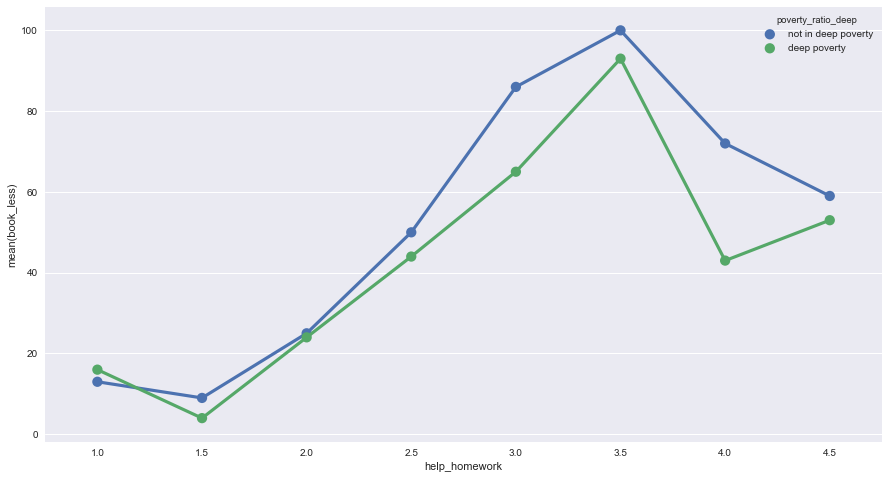

In [100]:
plt.figure(figsize=(15, 8))
ax = sns.pointplot(x=new_group.help_homework, y=new_group['book_less'], hue=new_group['poverty_ratio_deep'])

In [90]:
early['poverty_ratio_deep']

0       True
1      False
2       True
3      False
4       True
5      False
6      False
7       True
8       True
9       True
10     False
11      True
12     False
13     False
14      True
15     False
16     False
17      True
18      True
19     False
20      True
21      True
22      True
23     False
24      True
25      True
26     False
27      True
28     False
29     False
       ...  
726     True
727     True
728    False
729     True
730     True
731    False
732    False
733     True
734     True
735    False
736     True
737    False
738    False
739    False
740    False
741    False
742    False
743     True
744     True
745    False
746    False
747    False
748     True
749    False
750    False
751    False
752    False
753    False
754    False
755    False
Name: poverty_ratio_deep, dtype: bool

# Research Question 3: are poverty levels related to vocabulary and math scores?

What do the vocab and math distributions look like when plotted as seperate scatterplots with poverty ratios?

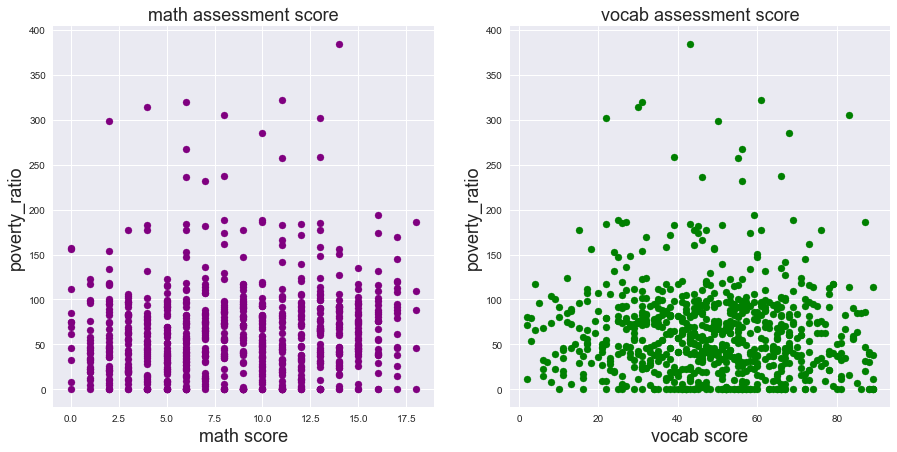

In [26]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(x=early['math'], y=early['poverty_ratio'],color='purple')
plt.ylabel('poverty_ratio', fontsize=18)
plt.xlabel('math score', fontsize=18)
plt.title('math assessment score',fontsize=18)

plt.subplot(1, 2, 2)
plt.scatter(x=early['vocab'],y=early['poverty_ratio'], color='green')
plt.ylabel('poverty_ratio',fontsize=18)
plt.xlabel('vocab score',fontsize=18)
plt.title('vocab assessment score',fontsize=18)

plt.show()

The McArthur vocab scores are clearly continous. However, the ECLS math assessment measurement scales are discrete so the math scatter plot is not interpretable.  

## Are vocabulary scores and poverty levels related?

Visual inspection of the scatterplot suggests no real positive or negative direction of the data. This is confimed by the the pearson correlation coefficent suggesting there is no relationship between poverty ratio and vocab scores based on sample data. 

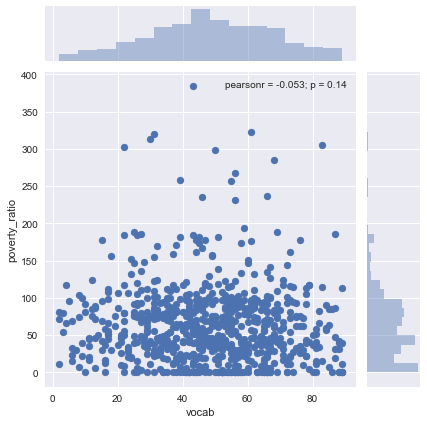

In [27]:
g=sns.jointplot(x="vocab", y="poverty_ratio", data=early)


On further visual inspection of the joint plot it appears lower vocabulary comprehension is possibiily realted to children in deep poverty. Would filtering out all but the children from families in deep poverty create a relationship between poverty and vocabulary score?

## Are deep levels of poverty and vocabulary scores related?
> Analysis method changed to Spearman's rank correlation coefficient instead of Pearson's coefficent since the measure of deep poverty is a dichotomous variable.

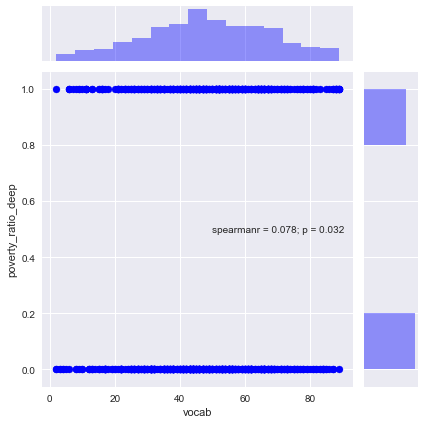

In [28]:
g = sns.jointplot("vocab", "poverty_ratio_deep", data=early, stat_func=spearmanr, color="b")

It would be much easier to see poverty levels compared to vocab scores in a bar plot.

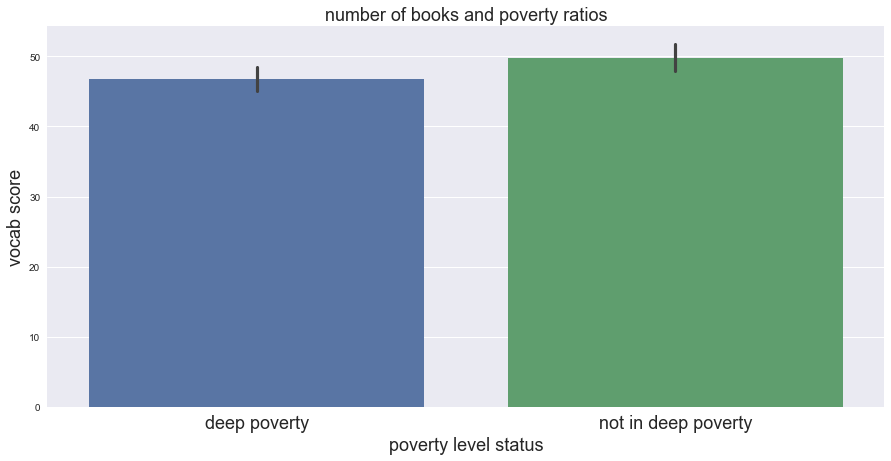

In [29]:
plt.figure(figsize=(15, 7))
abar =sns.barplot(y="vocab", x='poverty_ratio_deep',data=early)
abar.set_xticklabels(['deep poverty','not in deep poverty'],fontsize=18,rotation='horizontal')
plt.xlabel('poverty level status', fontsize=18)
plt.ylabel('vocab score', fontsize=18)
plt.title('number of books and poverty ratios', fontsize=18)
plt.show()

Students not in deep poverty performed slightly lower, on average, on the vocab assessment than students not in deep poverty. Still, it appears this difference was slight and not large enough to produce a significant result when analyzed using Spearman's rank correlation coefficient. 

# Are math scores and poverty levels related?

> The relationship between math scores and poverty ratios was analyzed using Spearman's rank correlation coefficient since the scatter plot of math's distribution revealed it was discrete. Applying a measure comparing ranked values of math and poverty ratios is appropriate in this instance. 
> Poverty levels and math scores were positivley related, meaning math scores tend to increase as poverty ratio levels also increase. This suggests children from families with higher incomes tended to score higher on the ECLS math assessment compared to children from lower income families. 

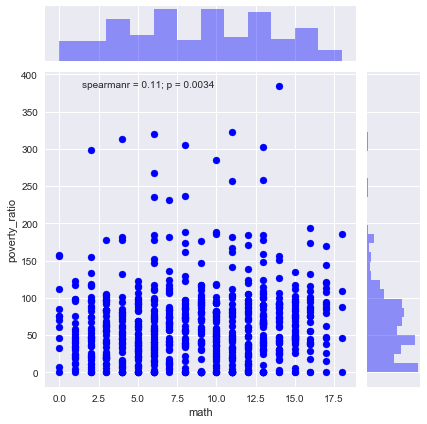

In [30]:
g = sns.jointplot("math", "poverty_ratio", data=early, stat_func=spearmanr, color="b")


# Future Directions
> Analytic Challenges:
1. Analyses in this report were limited to examining relationships between two variables. However, it's likely there are several variables significantly prediciting relationships. Multiple linear regression, or regression with 2 or more predictor variables, could increase the amount of variance accounted for in academic outcomes by the predictors. Would math and vocab scores be better predictors of poverty levels when combined in the same regression?
2. Missing values were deleted listwise after being obtained from the FACES.sav file. Finding other methods to deal with missing data such as imputation increases sample size. This ensures samples are more representative of their corresponding populations. 

> Theoretical Recommendations:
1. Further exploration amongnst early childhood variables is warranted for future research. Collecting data from large .SAV file
removing outliers /how to mitgate their impact.
2. A number of variables in the FACES survey were answered by parents. Including more items answered by children could offer a more holistic view
